In [4]:
import cv2
import mediapipe as mp
import numpy as np
import PoseModule as pm
from math import factorial
import csv
import os
from OutputGraph import outputGraph
from OutputData import outputData

In [5]:
cap = cv2.VideoCapture("inputvids/jocelynwalk.mp4")
detector = pm.poseDetector()
count = 0
direction = 0
form = 0
i = 0
# Meta.
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_size = (width, height)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
frame_list = []

right_hip_x = []
right_hip_y = []

right_knee_x = []
right_knee_y = []

right_ankle_x = []
right_ankle_y = []

right_shoulder_x = []
right_shoulder_y = []

right_elbow_x = []
right_elbow_y = []


# Initialize video writer.
video_output = cv2.VideoWriter('outputvids/jocelynwalkoutput2.mp4', fourcc, fps, frame_size)

In [6]:
while cap.isOpened():
    ret, img = cap.read() 
    if not ret:
        print("Null.Frames")
        break
    width  = cap.get(3)  # float `width`
    height = cap.get(4)  # float `height`
    
    img = detector.findPose(img, False)
    lmList = detector.findPosition(img, False)
    current_Frame = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    if len(lmList) != 0:
        left_hip = detector.findAngle(img, 11, 23, 25)
        left_knee = detector.findAngle(img, 23, 25, 27)
        left_ankle = detector.findAngle(img, 25, 27, 31)
        left_shoulder = detector.findAngle(img, 13, 11, 23)
        left_elbow = detector.findAngle(img, 11, 13, 15)

        
        right_hip = detector.findAngle(img, 12, 24, 26)
        right_knee = detector.findAngle(img, 24, 26, 28)
        right_ankle = detector.findAngle(img, 26, 28, 32)
        right_shoulder = detector.findAngle(img, 14, 12, 24)
        right_elbow = detector.findAngle(img, 12, 14, 16)

        # Change the Gender Accordingly
        frame_list.append([current_Frame,right_hip,right_knee,right_ankle,right_elbow,right_shoulder, "gender"])
        
        right_hip_x.append(current_Frame)
        right_hip_y.append(int(right_hip))
        
        right_knee_x.append(current_Frame)
        right_knee_y.append(int(right_knee))
        
        right_ankle_x.append(current_Frame)
        right_ankle_y.append(int(right_ankle))
        
        right_shoulder_x.append(current_Frame)
        right_shoulder_y.append(int(right_shoulder))
        
        right_elbow_x.append(current_Frame)
        right_elbow_y.append(int(right_elbow))
        

                    
        
        cv2.putText(img, str(int(current_Frame)), (25, 60), cv2.FONT_HERSHEY_PLAIN, 5,
                    (255, 0, 0), 2)

        
    cv2.imshow('GAIT', img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    video_output.write(img)

cap.release()
cv2.destroyAllWindows()
video_output.release()

Null.Frames


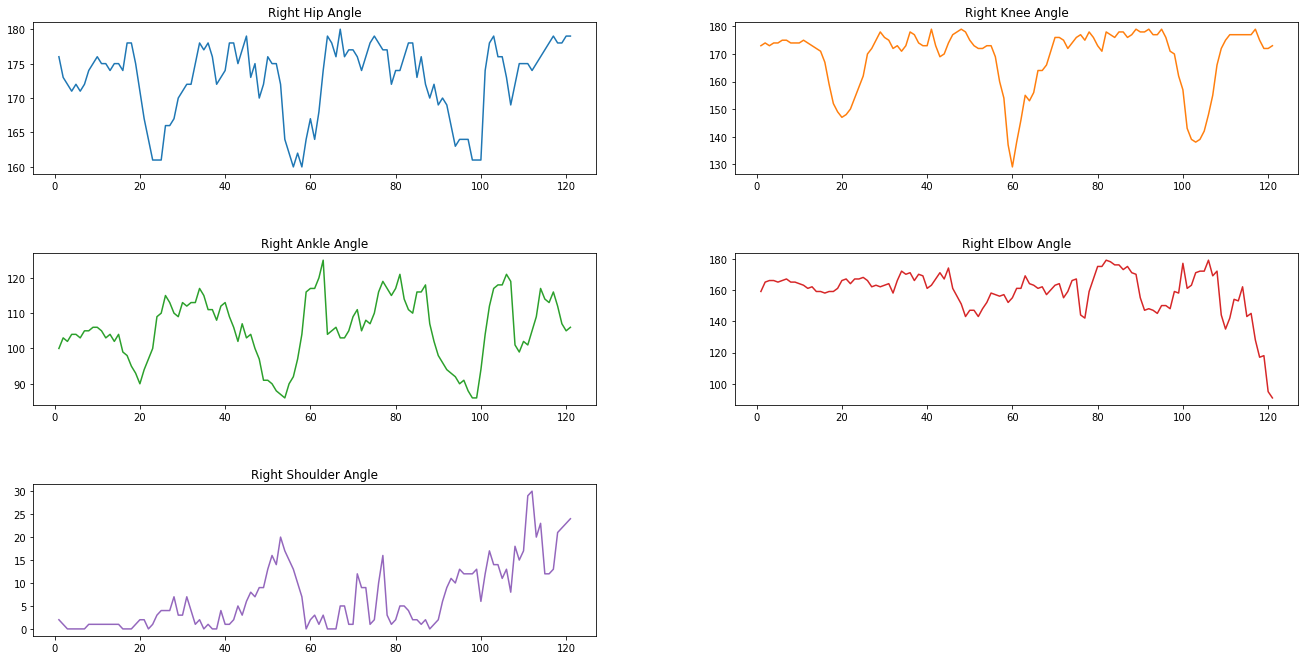

In [7]:
# GRAPH OUTPUT
outputGraph('jocelynwalkgraph', 
            right_hip_x, right_hip_y, 'Right Hip Angle',
            right_knee_x, right_knee_y, 'Right Knee Angle',
            right_ankle_x, right_ankle_y, 'Right Ankle Angle',
            right_elbow_x, right_elbow_y, 'Right Elbow Angle',
            right_shoulder_x, right_shoulder_y, 'Right Shoulder Angle')


In [8]:
# DATA OUTPUT
outputData('jocelynwalkdata', frame_list)

In [9]:
directory = os.fsencode("inputvids")
  
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".mp4"):
        print(filename) #do your video process here
        continue
    else:
        continue

a.mp4
jocelynwalk.mp4
malegait.mp4
nfwalking.mp4
womangait.mp4
